# Noah Delano Weekly Check-In 12 November 25

### Problem I Am Proud Of

For this week, which I know I am submitting a bit late, I wanted to shake things up with my weekly check-in. I know lately we have been dealing with methods of solving systems of equations, specifically jacobi and Gauss-Siedel Iteration. However, I have had little interest in some of those methods due to the conveince and little error Gaussian elimation is. So I want to turn the clock back a bit when we were using methods, such as interpolation, in order to find good approximations. More specifically, I wanted to explore a method I found very interesting, but never really had a chance to toy around with it: Neville's algorithm

Now Neville's algorithm is very interesting as it basically revolves around the concept of linear interpolation. The big difference is that it is composed of multiple linear interpolation algorithms in order to find the best approximation for some given point. Lets first talk very generally about it first. Say we are given three points for a function, say $(x_0,y_0)$, $(x_1,y_1)$, and $(x_2,y_2)$. Our goal is to try and and approx the value at some value, say k, in the function. With these points, we have an approximation of 

$$f(k) \approx P_0(k) = f(x_0)$$
$$f(k) \approx P_1(k) = f(x_1)$$
$$f(k) \approx P_2(k) = f(x_2)$$

Now this is already a bit of a mess as we have three seperate approx.s for $f(k)$. So First off we can use some linear interpolation (specifically Lagrange) for some better results:

$$f(k) \approx P_{0,1}(k) = \frac{(k-x_1)}{(x_0-x_1)}f(x_0) + \frac{(k-x_0)}{(x_1-x_0)}f(x_1)$$
$$f(k) \approx P_{1,2}(k) = \frac{(k-x_2)}{(x_1-x_2)}f(x_1) + \frac{(k-x_2)}{(x_2-x_1)}f(x_2)$$

Now since we know that $P_0(x_0) = f(x_0)$, $P_1(x_1) = f(x_1)$, and $P_2(x_2) = f(x_2)$, then

$$f(k) \approx P_{0,1}(k) = \frac{(k-x_1)}{(x_0-x_1)}P_0 + \frac{(k-x_0)}{(x_1-x_0)}P_1 = \frac{(k-x_1)P_0-(k-x_0)P_1}{x_0-x_1}$$
$$f(k) \approx P_{1,2}(k) = \frac{(k-x_2)}{(x_1-x_2)}P_1 + \frac{(k-x_2)}{(x_2-x_1)}P_2 = \frac{(k-x_2)P_1-(k-x_1)P_2}{x_1-x_2}$$

Now we have made our approximation a little bit easier. Now we can take it a step further now that we have $P_{0,1}(k)$ and $P_{1,2}(k)$. So

$$f(k) \approx P_{0,1,2}(k) = \frac{(k-x_1)(k-x_2)}{(x_0-x_1)(x_0-x_2)}P_0 + \frac{(k-x_0)(k-x_2)}{(x_1-x_0)(x_1-x_2)}P_1 + \frac{(k-x_0)(k-x_1)}{(x_2-x_0)(x_2-x_1)}P_2$$

$$f(k) \approx P_{0,1,2}(k) = \frac{(k-x_1)(k-x_2)}{(x_0-x_1)(x_0-x_2)}P_0 - \frac{(k-x_0)(k-x_2)}{(x_0-x_1)(x_1-x_2)}P_1 + \frac{(k-x_0)(k-x_1)}{(x_0-x_2)(x_1-x_2)}P_2$$

$$f(k) \approx P_{0,1,2}(k) = \frac{(k-x_1)(k-x_2)(x_1-x_2)}{(x_0-x_1)(x_0-x_2)(x_1-x_2)}P_0 - \frac{(k-x_0)(k-x_2)(x_0-x_2)}{(x_0-x_1)(x_0-x_2)(x_1-x_2)}P_1 + \frac{(k-x_0)(k-x_1)(x_0-x_1)}{(x_0-x_1)(x_1-x_2)(x_0-x_2)}P_2$$

$$f(k) \approx P_{0,1,2}(k) = \frac{(k-x_1)(k-x_2)(x_1-x_2)P_0-(k-x_0)(k-x_2)(x_0-x_2)P_1+(k-x_0)(k-x_1)(x_0-x_1)P_2}{(x_0-x_1)(x_0-x_2)(x_1-x_2)}$$

$$f(k) \approx P_{0,1,2}(k) = \frac{(k-x_1)(k-x_2)(x_1-x_2)P_0-(k-x_0)(k-x_2)(x_0-x_1+x_1-x_2)P_1+(k-x_0)(k-x_1)(x_0-x_1)P_2}{(x_0-x_1)(x_0-x_2)(x_1-x_2)}$$

$$f(k) \approx P_{0,1,2}(k) = \frac{(k-x_1)(k-x_2)(x_1-x_2)P_0-(k-x_0)(k-x_2)(x_0-x_1)P_1-(k-x_0)(k-x_2)(x_1-x_2)P_1+(k-x_0)(k-x_1)(x_0-x_1)P_2}{(x_0-x_1)(x_0-x_2)(x_1-x_2)}$$

$$f(k) \approx P_{0,1,2}(k) = \frac{(k-x_1)(k-x_2)(x_1-x_2)P_0-(k-x_0)(k-x_2)(x_1-x_2)P_1}{(x_0-x_1)(x_0-x_2)(x_1-x_2)} - \frac{(k-x_0)(k-x_2)(x_0-x_1)P_1-(k-x_0)(k-x_1)(x_0-x_1)P_2}{(x_0-x_1)(x_0-x_2)(x_1-x_2)}$$

$$f(k) \approx P_{0,1,2}(k) = \frac{(k-x_2)}{(x_0-x_2)}\cdot\frac{(k-x_1)P_0-(k-x_0)P_1}{(x_0-x_1)} - \frac{(k-x_0)}{(x_0-x_2)}\cdot\frac{(k-x_2)P_1-(k-x_1)P_2}{(x_1-x_2)}$$

$$f(k) \approx P_{0,1,2}(k) = \frac{(k-x_2)}{(x_0-x_2)}P_{0,1}(k) - \frac{(k-x_0)}{(x_0-x_2)}P_{1,2}(k)$$

This is to show that each approx is comprised of approxs already made, all culminating in one approx that has very little error. A better way to think of it is as an upside down triangle, filtering towards a single point. Here is a perfect image of that visualization: 

$$P_{0,0} \hspace{5 mm} P_{1,1} \hspace{5 mm} P_{2,2} \hspace{5 mm} P_{3,3} \hspace{5 mm} P_{4,4} \hspace{5 mm} P_{5,5}$$

$$P_{0,1} \hspace{5 mm} P_{1,2} \hspace{5 mm} P_{2,3} \hspace{5 mm} P_{3,4} \hspace{5 mm} P_{4,5}$$

$$P_{0,2} \hspace{5 mm} P_{1,3} \hspace{5 mm} P_{2,4} \hspace{5 mm} P_{3,5}$$

$$P_{0,3} \hspace{5 mm} P_{1,4} \hspace{5 mm} P_{2,5}$$

$$P_{0,4} \hspace{5 mm} P_{1,5}$$

$$P_{0,5}$$

Where $P_{0,5}$ is the best approx. If we wanted to generalize our approxs as it goes down our little filter, then we can say that:

$$P_{i,j}(k) = \frac{(k-x_j)P_{i,j-1}-(k-x_i)P_{i+1,j}}{x_i-x_j}$$

I am very happy with myself showing off this theorem, but when it comes to writing it in code and shwoing its applications with a larger amount of points is where I began to stumble upon myself. So here is how I approached this part of the algorithm

### Problem I Struggled With

In [1]:
#Imports for the following code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#requirements: x and y points, as well as the vaue we are approximating, f(k)
def polyNeville(x, y, k):
    if(len(x) != len(y)):
        return print('Error: Must have the same amount of x and y values')
    #Number of data points given
    n = len(x)
    #Create a nxn matrix of 0s in order to store our values
    q = np.zeros([n, n], dtype = float)
    #Create a big graph for our plot
    plt.figure(figsize=(10,30))
    #For our diagonal values, such as [0,0] and [1,1], we store our P_{0,0} and P_{1,1}
    for i in range(n):
        q[i,i] = y[i]
        plt.hlines(q[i,i],k-.5,k+.5,colors='r',linestyles='dashed')
        
    #This took a bit as I wanted to ensure that it goes through the diagonal line of values as it approaches q[0,n], whhich 
    #will contain the approximation. This is to ensure each approximation uses a previous approximation already used, and not a
    #zero
    #e.g. P_{0,0}->P_{1,1}->P_{2,2}->P_{3,3}->P_{4,4}->P_{5,5}
    #            |        |        |        |        |
    #        P_{0,1}->P_{1,2}->P_{2,3}->P_{3,4}->P_{4,5}
    #               |        |        |        |        
    #           P_{0,2}->P_{1,3}->P_{2,4}->P_{3,5}
    #                  |        |        |       
    #              P_{0,3}->P_{1,4}->P_{2,5}
    #                     |        |
    #                 P_{0,4}->P_{1,5}
    #                        |        
    #                    P_{0,5}
    
    for diff in range(1,n):
        for i in range(n-diff):
            j = i + diff
            #Algorithm noted at the end of the previous section
            q[i,j] = ((k-x[j])*q[i,j-1] - (k-x[i])*q[i+1,j]) / (x[i] - x[j])
            plt.hlines(q[i,j],k-.5,k+.5,colors='r',linestyles='dashed')

    plt.plot(k,q[0,n-1],'k*')
    plt.hlines(q[0,n-1],k-.5,k+.5,colors='k',linestyles='solid',label='Approx.')
    plt.xlabel
    print('f(k) approxmately equals ',q[0,n-1])
    plt.legend()
    plt.show() 
    
    return q[0,n-1]

f(k) approxmately equals  17.8770925


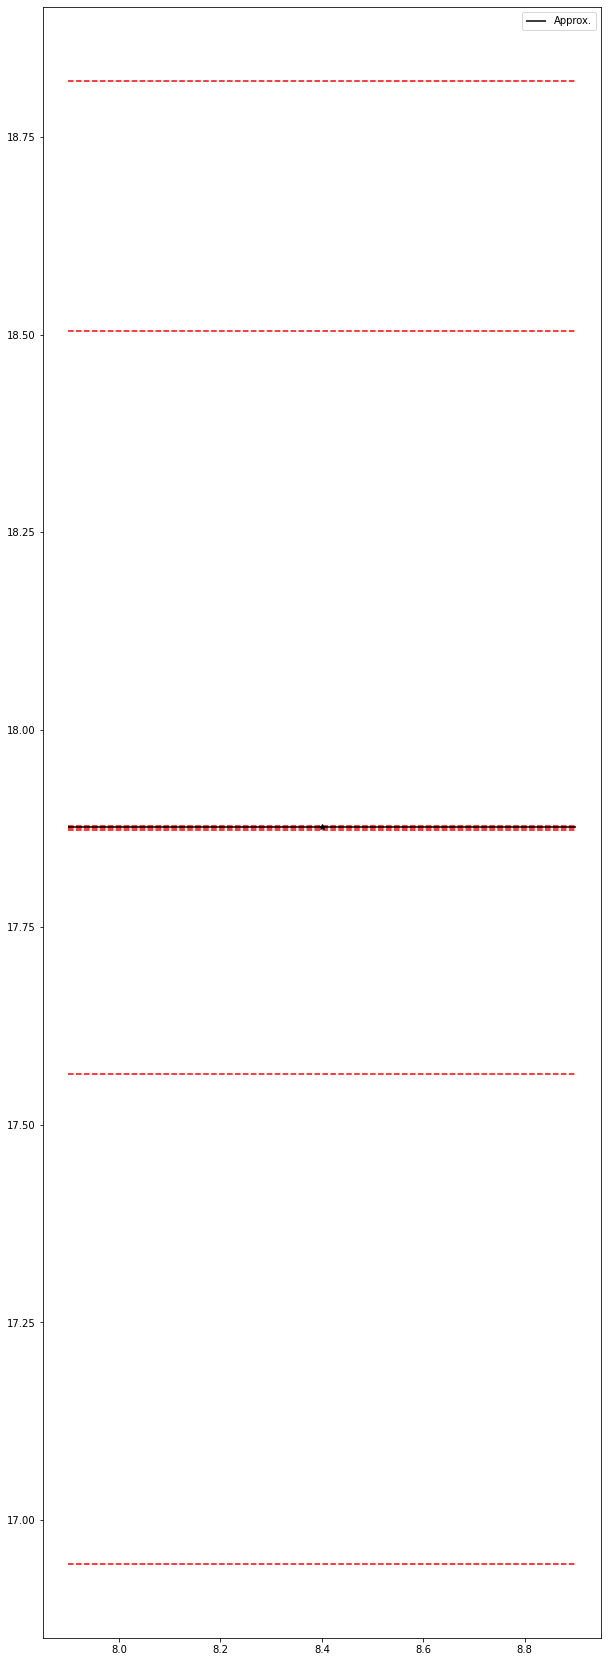

17.8770925

In [3]:
#Example problem
x = np.array([8.1, 8.3, 8.6, 8.7], dtype=float)
y = np.array([16.9446, 17.56492, 18.50515, 18.82091], dtype=float)
#Based on these points, Trying to get approximation at k=8.4
polyNeville(x,y,8.4)

#The real answer is 17.87709, so we did pretty well

In [4]:
def f(x):
    return 3*(x**3) - 2*(x**2) - x**(1/2) + 2

f(k) approxmately equals  73.3862274853331


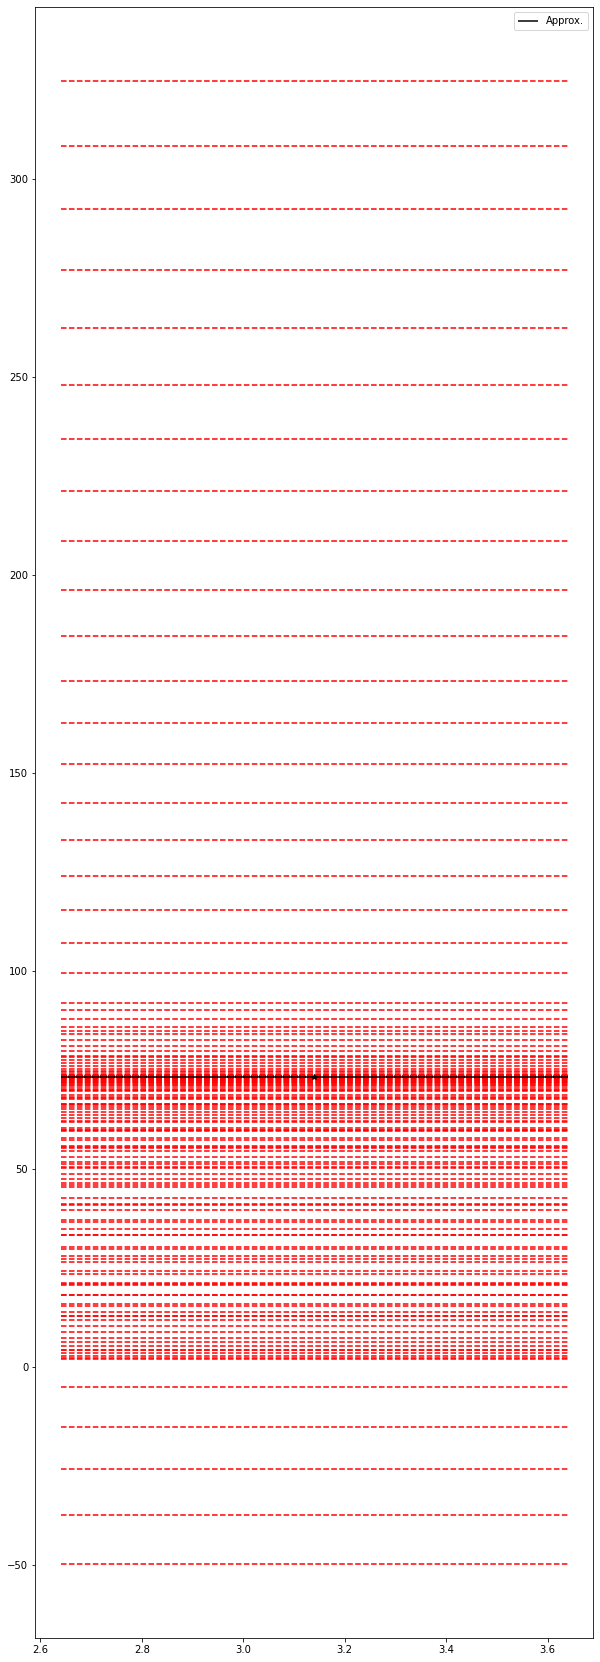

73.3862274853331

In [5]:
x = np.linspace(1,5,50)
y = f(x)

polyNeville(x,y,3.14)

In [6]:
f(3.14)

73.38622748533307

Both examples did very well, reaching the real answer with little error, making this another good method of approximation.

### How I Contributed To My Group

Once again, this was a bit of a weird week as my whole group pretty much understood the concept, and therefore didn't really have much to discuss. We only had the one session before this check-in, which I ended up leaving early due to a major panic attack I was having. But besides that, Avi went over a bit more of the code package he had made a week or two back and how it applies to the iteration methods. Like I said, I didn't find the iterations methods very interesting, or at least it just didn't grab my attention, hence why I did a bit of a detour on this check-in, which Joanna said would be alright.I had a lot of fun going back and exploring a topic related to what we have learned this semester

### My Goals For Next Week

Since this is my last check-in, besides the final reflection, I guess my main goal is to try and explore more about numerical analysis in the coming future. With graduation closing in, I am wanting to go to grad school for math, specifically in number theory, which I know shares some theorems and ideas from numerical analysis, but only on rational numbers. I'd like to work with Joanna in the future and find more applications of numerical analysis in both number theory and cryptography. I know my work may have been lacking this semester (mostly due to my hatred of online learning), but I don't want to up and drop everything I learned this semester, so I think this would be a great idea.